
# Data 620 - Week3 Group Assignment 2 
# Team Members:  Ahm Hamza, Ali Ahmed, Nilsa Bermudez, Ursula Podosenin


Week Three - Part 2 - Assignment Data Sets
Assignment
 Task: Submit to complete this assignment
 Due June 22 at 11:59 PM
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  



In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Load the graph
Graph = nx.davis_southern_women_graph()


# Split the nodes into women and events and calculate Eigenvector Centrality:


In [3]:
women = [n for n, d in Graph.nodes(data=True) if d["bipartite"] == 0]
events = [n for n, d in Graph.nodes(data=True) if d["bipartite"] == 1]
centrality = nx.eigenvector_centrality(Graph)
#print(centrality)

# Find the 2 most central (influential) women

In [4]:
top_women = sorted(women, key=lambda x: centrality[x], reverse=True)[:2]

# Create a table showing which events these top women attended

In [5]:
rows = []
for woman in top_women:
    for event in Graph.neighbors(woman):  # Get connected event nodes
        rows.append({"Woman": woman, "Event": event})

event_table = pd.DataFrame(rows)

# Set the position and draw the event nodes in red, the women in blue.  Highlight the top 2 in gold (it was hard to see the top two without doing this)

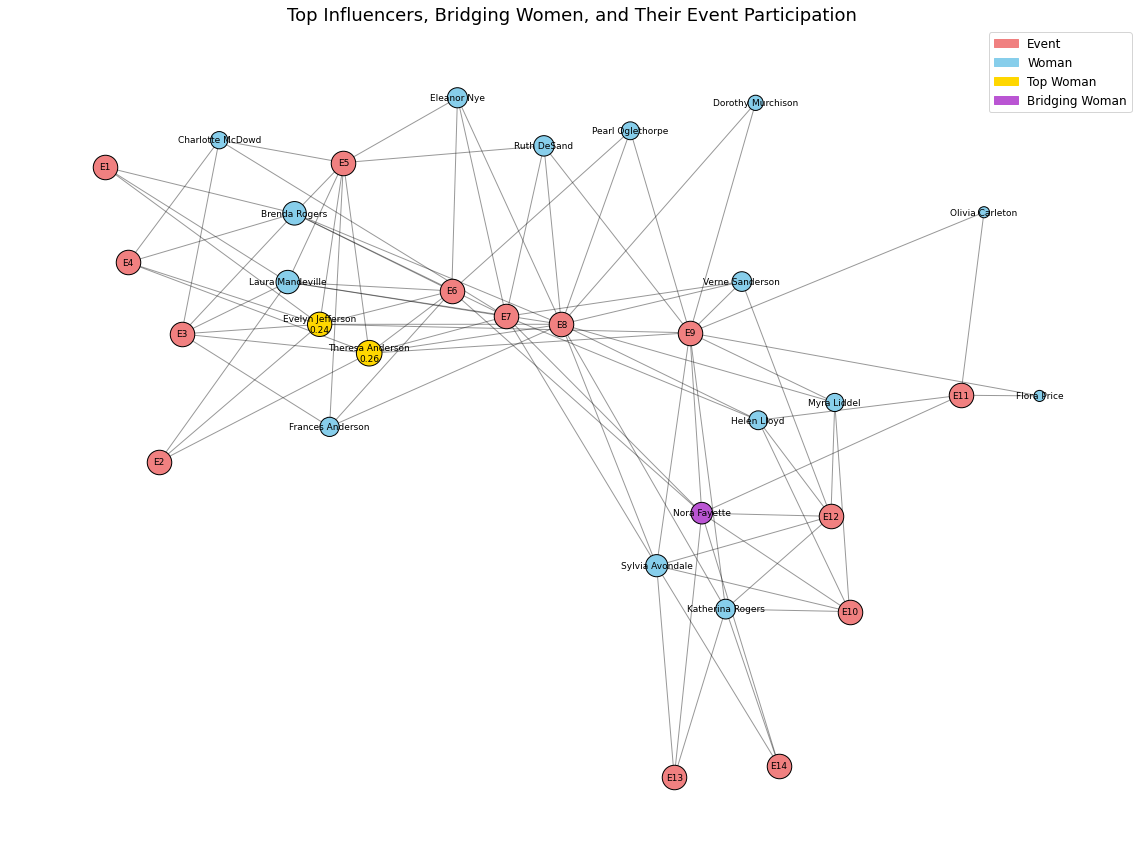

Top Influencers and the Events They Attended:
               Woman Event
0   Theresa Anderson    E2
1   Theresa Anderson    E3
2   Theresa Anderson    E4
3   Theresa Anderson    E5
4   Theresa Anderson    E6
5   Theresa Anderson    E7
6   Theresa Anderson    E8
7   Theresa Anderson    E9
8   Evelyn Jefferson    E1
9   Evelyn Jefferson    E2
10  Evelyn Jefferson    E3
11  Evelyn Jefferson    E4
12  Evelyn Jefferson    E5
13  Evelyn Jefferson    E6
14  Evelyn Jefferson    E8
15  Evelyn Jefferson    E9

Top Bridging Women (by Betweenness Centrality):
Nora Fayette — Betweenness: 0.1086
Evelyn Jefferson — Betweenness: 0.0924


In [9]:
# Loading the graph
Graph = nx.davis_southern_women_graph()

# Separating women and events
women = [n for n, d in Graph.nodes(data=True) if d["bipartite"] == 0]
events = [n for n, d in Graph.nodes(data=True) if d["bipartite"] == 1]

# Computing the centrality metrics
eigen_centrality = nx.eigenvector_centrality(Graph)
between_centrality = nx.betweenness_centrality(Graph)

# Identifying the top 2 influencers by eigenvector centrality
top_women = sorted(women, key=lambda x: eigen_centrality[x], reverse=True)[:2]

# Identifying the top 2 bridging women by betweenness centrality
bridging_women = sorted(women, key=lambda x: between_centrality[x], reverse=True)[:2]

# Creating a table showing which events the top women attended
rows = []
for woman in top_women:
    for event in Graph.neighbors(woman):
        rows.append({"Woman": woman, "Event": event})
event_table = pd.DataFrame(rows)

# Setting a layout and create the figure
position = nx.spring_layout(Graph, seed=62)
plt.figure(figsize=(16, 12))

# Drawing event nodes in red
nx.draw_networkx_nodes(Graph, position, nodelist=events, node_color="lightcoral", 
                       node_size=600, edgecolors="black")

# Assigning node color and size for women
node_colors = []
node_sizes = []

for w in women:
    if w in top_women:
        node_colors.append("gold")
    elif w in bridging_women:
        node_colors.append("mediumorchid")  # purple for bridging ladies
    else:
        node_colors.append("skyblue")
    
    node_sizes.append(2500 * eigen_centrality[w] if w in eigen_centrality else 300)

nx.draw_networkx_nodes(Graph, position, nodelist=women, node_color=node_colors,
                       node_size=node_sizes, edgecolors="black")

# Drawing edges and labels
nx.draw_networkx_edges(Graph, position, alpha=0.4)
labels = {
    n: f"{n}\n{eigen_centrality[n]:.2f}" if n in top_women else n
    for n in Graph.nodes()
}
nx.draw_networkx_labels(Graph, position, labels, font_size=9)

# Creating a legend
event_patch = mpatches.Patch(color="lightcoral", label="Event")
woman_patch = mpatches.Patch(color="skyblue", label="Woman")
top_patch = mpatches.Patch(color="gold", label="Top Woman")
bridge_patch = mpatches.Patch(color="mediumorchid", label="Bridging Woman")

plt.title("Top Influencers, Bridging Women, and Their Event Participation", fontsize=18)
plt.axis("off")
plt.legend(handles=[event_patch, woman_patch, top_patch, bridge_patch], loc="best", fontsize=12)
plt.tight_layout()
plt.show()

# Showing the table of event attendance
print("Top Influencers and the Events They Attended:")
print(event_table)

# Showing the bridging women list
print("\nTop Bridging Women (by Betweenness Centrality):")
for w in bridging_women:
    print(f"{w} — Betweenness: {between_centrality[w]:.4f}")


#  Summary - 
# We see that the top two influencers are Theresa and Evelyn.  We can assume that they have stronger social connections or are part of the same social circle (they're friends).